In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
# loading data
data = load_boston()

In [3]:
# data description
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
# target variable
y = data.target

In [6]:
# predictor variables
X = pd.DataFrame(data.data, columns = data.feature_names)

In [7]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


<br><br>
## scatterplot between -  % lower status of the population vs Median value of owner-occupied homes in $1000's

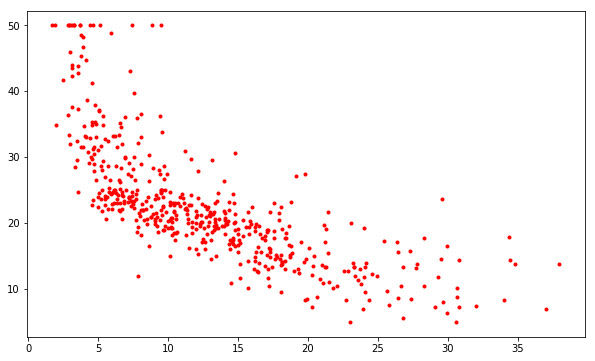

In [8]:
plt.subplots(figsize = (10, 6))
plt.scatter(x = X.LSTAT, y = y, marker = '.', color = 'r')
plt.show()

In [9]:
# linear model with single predictor
regressor = LinearRegression()
regressor.fit(X[['LSTAT']], y)
y_pred_linear = regressor.predict(X[['LSTAT']])

In [10]:
# polynomial feaures
poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X[['LSTAT']])
X_poly[0:5, :]

array([[  1.      ,   4.98    ,  24.8004  , 123.505992],
       [  1.      ,   9.14    ,  83.5396  , 763.551944],
       [  1.      ,   4.03    ,  16.2409  ,  65.450827],
       [  1.      ,   2.94    ,   8.6436  ,  25.412184],
       [  1.      ,   5.33    ,  28.4089  , 151.419437]])

In [11]:
# model with polynomial feature
regressor_poly = LinearRegression()
regressor_poly.fit(X_poly, y)
y_pred_n_linear = regressor_poly.predict(X_poly)

<br><br>
## Visualization

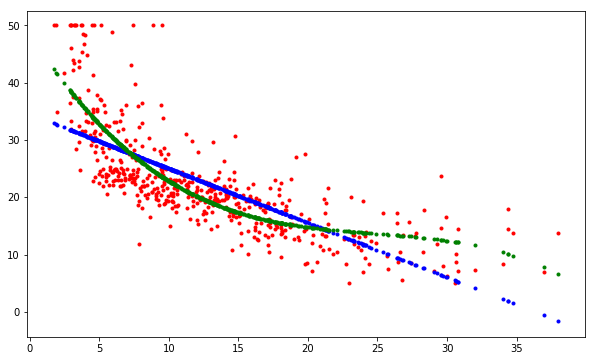

In [12]:
plt.subplots(figsize = (10, 6))
plt.scatter(X.LSTAT, y, marker = '.', color = 'r')
plt.scatter(X.LSTAT, y_pred_linear, marker = '.', color = 'b')
plt.scatter(X.LSTAT, y_pred_n_linear, marker = '.', color = 'g')
plt.show()

# red scatterplot - actual values
# blue scatterplot - linear regression predictions
# green scatterplot - polynomial regression predictions